# Electical Circuits

In [10]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi, sin, cos, exp, tan, log,log10
from mplcursors import cursor  # separate package must be installed

from bookfuncs.simuParams import  SimuParam
from bookfuncs.plotfunc import plot1DTparametric,plot1DS,plot1DSparametric,S1d,plot1DSparametricUwrap,plot1DSparametricdB



<function matplotlib.pyplot.show(close=None, block=None)>

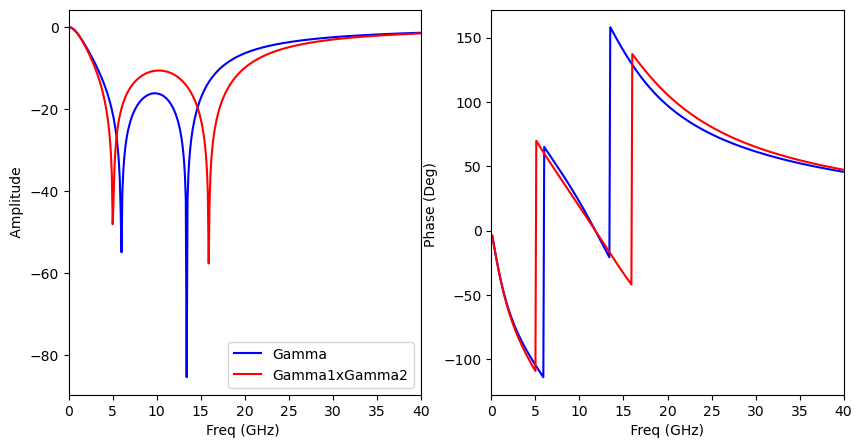

In [19]:
def addElementCircuit(type,Z1,Z2):
    if type=='Series':
        Zeq=Z1+Z2
    if type=='Shunt':
        Zeq=(Z1*Z2)/(Z1+Z2)
    return Zeq

def createRLC(freq,type,R,L,C):
    omega=2*pi*freq
    if type=='Series':
        Z=R+1j*omega*L+1/(1j*omega*C)
    if type=='Shunt':
        Zc=1/(1j*omega*C)
        ZLind=1j*omega*L
        Z=addElementCircuit(type,Zc,ZLind)
        Z=addElementCircuit(type,Z,R)
    return Z

def gammaFromZ(Z0,Zeq):
    gamma=(Zeq-Z0)/(Zeq+Z0)
    return gamma

f=np.arange(0.1,40,0.1)*1e9
omega=2*pi*f
R1=50
R2=50
L1=1e-9
L2=1e-9
C1=1e-12
C2=0.1e-12
Z0=50
Z1=createRLC(f,'Series',R1,L1,C1)
Z2=createRLC(f,'Series',R2,L2,C2)
Zeq=addElementCircuit('Shunt',Z1,Z2)

Gamma=gammaFromZ(Z0,Zeq)
Gamma1=gammaFromZ(Z0,Z1)
Gamma2=gammaFromZ(Z0,Z2)

Gamma12=Gamma2*Gamma1


fig2,ax=plt.subplots(1,2)
fig2.set_size_inches((10,5))
plot1DSparametricdB(ax,f,[0,40],(0,Gamma,'b','-'),
                          (0,Gamma12,'r','-'))
ax[0].legend(['Gamma','Gamma1xGamma2'])
cursor(hover=True)
plt.show

array([-1.39193059e+04,  1.39628156e+04,  1.59514595e+13, -1.59511928e+13,
        1.93024488e-01])

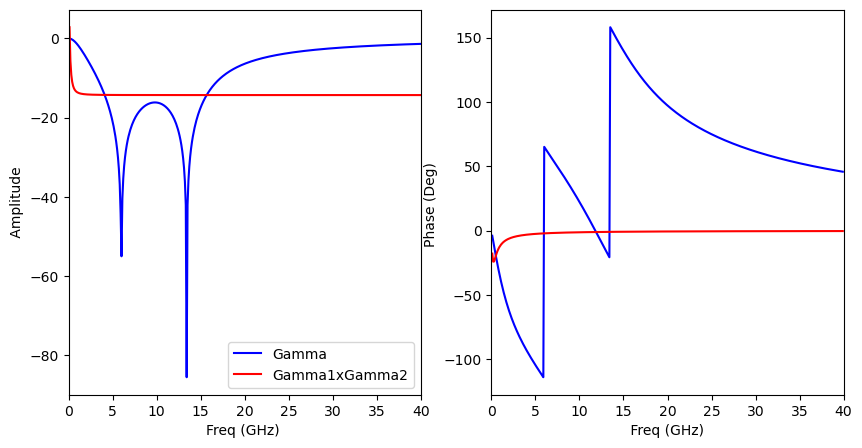

In [ ]:
# >>> exec("""def a(x):
# ...   return x+1""")
# >>> a(2)
# 3
def fitRLC2nd(f,p1,p2,A1,A2,dc):
    s=1j*2*pi*f
    y=dc+A1/(s-p1)+A2/(s-p2)
    return np.hstack([np.real(y), np.imag(y)])

popt, pcov = curve_fit(fitRLC2nd,f, np.hstack([np.real(Gamma), np.imag(Gamma)]))
fittemp=fitRLC2nd(f,*popt)
fitGamma=fittemp[:399]+1j*fittemp[399:]

fig2,ax=plt.subplots(1,2)
fig2.set_size_inches((10,5))
plot1DSparametricdB(ax,f,[0,40],(0,Gamma,'b','-'),
                          (0,fitGamma,'r','-'))
ax[0].legend(['Gamma','Gamma1xGamma2'])
cursor(hover=True)
plt.show
popt

798